## In this jupyter notebook I will build an interactive dashboard on Spotify data taken from Kaggle. Additionally I will build a classification algorithm which is able to predict the genre of each song.

This my first original portfolio project. After being halfway through the project I found out that this dataset is not the absolute best to use. Yes, there are no NULL values. Eventhough, I am certainly enjoying my time with this datasets, quality is lacking. For example, 
<ul>
    <li> some songs have popularity set to zero, even-though by definition of the dataset every song should have a high popularity (popularity compared to what is not explained on Kaggle). </li>
    <li> Also in the genre field, some values have been set to 'set()' instead of 'pop' or some other genre. </li>
    <li> Furthermore, there are duplicates in the dataset which suggests that this is a culmination of the top100 songs of the years 2000 up to and including 2019; instead of the top2000 of the two decades combined. </li>
    <li>However, some songs are released in 2020; which should not be possible by definition.</li>
</ul>
Nevertheless, it is a fun dataset to be working with on my first project. 

Below is some code that I did not use in the end. But probably comes in handy for future projects. 

In [1]:
#!pip install kaggle
#import kaggle
#from kaggle.api.kaggle_api_extended import KaggleApi
#api = KaggleApi()
#api.authenticate()

#!kaggle datasets list -s 'spotify' 
#Looking up all datasets which have the word spotify in their description

#kaggle datasets download -d 'paradisejoy/top-hits-spotify-from-20002019' 
#downloading a particular dataset, I am getting an error, so I am downloading by hand. 

#!unzip archive.zip -d 
#unzipping 

Import libraries

In [2]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Setting backgroundcolor of matplotlib.pyplot to black
plt.rcParams['axes.facecolor'] = 'black'

import seaborn as sns


After downloading the 'archive.zip' file from https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019, I unzipped the file. 

In [4]:
# loading the temp.zip and creating a zip object
with ZipFile("data/archive.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(path="data/")
    
#saving the csv file extracted to a DataFrame object
df=pd.read_csv('data/songs_normalize.csv')

Some exploratory code to understand the data

In [5]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [6]:
df.shape

(2000, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [8]:
# checking for null values
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [9]:
#checking duplicates in the data
df.duplicated().value_counts()

False    1941
True       59
dtype: int64

In [10]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)

In the genre field, there are some values that take the value 'set()', so for now we remove these values. 

In [11]:
df = df[df['genre'] != 'set()']

In [12]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000
mean,228761.545076,2009.523710,59.658155,0.666998,0.721349,5.387181,-5.510079,0.552892,0.104229,0.127565,0.015136,0.181958,0.551702,120.158735
std,39188.660750,5.881462,21.573138,0.140733,0.152861,3.607960,1.942778,0.497324,0.096449,0.171947,0.087510,0.141257,0.220776,26.989316
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203560.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.480000,0.000000,0.039900,0.013500,0.000000,0.088600,0.388500,98.985500
50%,223253.000000,2010.000000,65.000000,0.676000,0.738000,6.000000,-5.283000,1.000000,0.061200,0.055400,0.000000,0.125000,0.558000,120.022000
75%,248133.000000,2015.000000,73.000000,0.764000,0.840000,8.000000,-4.168000,1.000000,0.130000,0.175000,0.000067,0.242000,0.730000,134.332000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


Checking out which Britney songs are in this top 2000

In [13]:
df_britney = df[df['artist'] == 'Britney Spears']['song']
df_britney

0                                  Oops!...I Did It Again
34                                 Born to Make You Happy
98                                                  Lucky
111                                       I'm a Slave 4 U
223                            Overprotected - Radio Edit
278                       I'm Not a Girl, Not Yet a Woman
326     Me Against the Music (feat. Madonna) - LP Vers...
402                                                 Toxic
429                                        My Prerogative
459                                             Everytime
702                                            Gimme More
813                                         Break the Ice
822                                             Womanizer
830                                           Piece of Me
907                                                Circus
915                                         If U Seek Amy
1122                                           I Wanna Go
1136          

We want to generate neat-looking visuals in order to perform Exploratory Data Analysis. 

I do not want to use the original column names to be depicted in the matplotlib graphs, therefore I define a function that converts the column names to their graph names. This is done by the function below. 

In [14]:
def map_col_name_to_graph_name(column_name):
    columns = df.columns.tolist()
    graph_names = ['Artist',
     'Song Name',
     'Duration (Milliseconds)',
     'Explicit',
     'Release Year',
     'Popularity',
     'Danceability',
     'Energy',
     'Key',
     'Loudness (Db)',
     'Mode',
     'Speechiness',
     'Acousticness',
     'Instrumentalness',
     'Liveness',
     'Valence',
     'Tempo (BPM)',
     'Genre']
    try: 
        index = columns.index(column_name)
    except:
        print('This is not a column name!')
    return graph_names[index]

First some scatter plots. We define a function where we have the option between both 2D and 3D scatterplots (using coloring). 

In [15]:
def make_graph_scatter(data, column_name_1, column_name_2, column_name_3 = 'white'):
    graph_name_1, graph_name_2 = map_col_name_to_graph_name(column_name_1), map_col_name_to_graph_name(column_name_2) 
    try: 
        graph_name_3 = map_col_name_to_graph_name(column_name_3)
    except:
        pass
    plt.scatter(x=column_name_1, y=column_name_2, c=column_name_3, data=data, s=0.8)
    plt.xlabel(graph_name_1)
    plt.ylabel(graph_name_2)
    if column_name_3 == 'white':
        plt.title(graph_name_2 + ' vs ' + graph_name_1)
    else:
        plt.title(graph_name_2 + ' vs ' + graph_name_1 + ' vs ' + graph_name_3)
        cmap = plt.get_cmap('hsv')
        plt.set_cmap(cmap)
        cbar = plt.colorbar()
        cbar.set_label(graph_name_3)
    plt.rc('font', size=10)
    plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=10)
    plt.show()

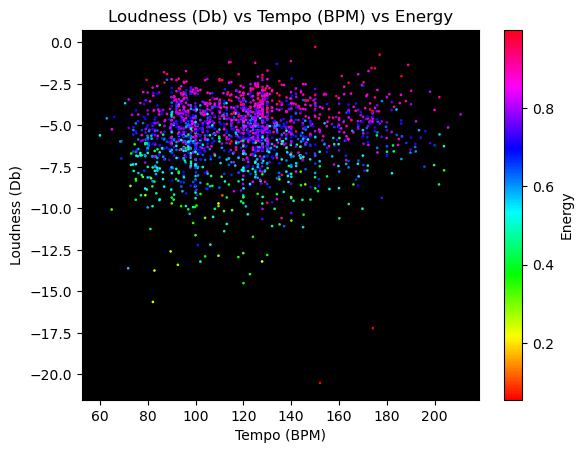

In [16]:
make_graph_scatter(data=df, column_name_1 = 'tempo', column_name_2 = 'loudness', column_name_3 = 'energy')

We see that there might be some positive correlation between Loudness and Energy, so we also would like to plot a heatmap of the correlation matrix.

In [17]:
def make_correlation_graph(data):
    plt.figure(figsize=(20,16))
    plt.rc('font', size=15)
    plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=20)
    sns.heatmap(data.corr(), annot=True)
    plt.show()

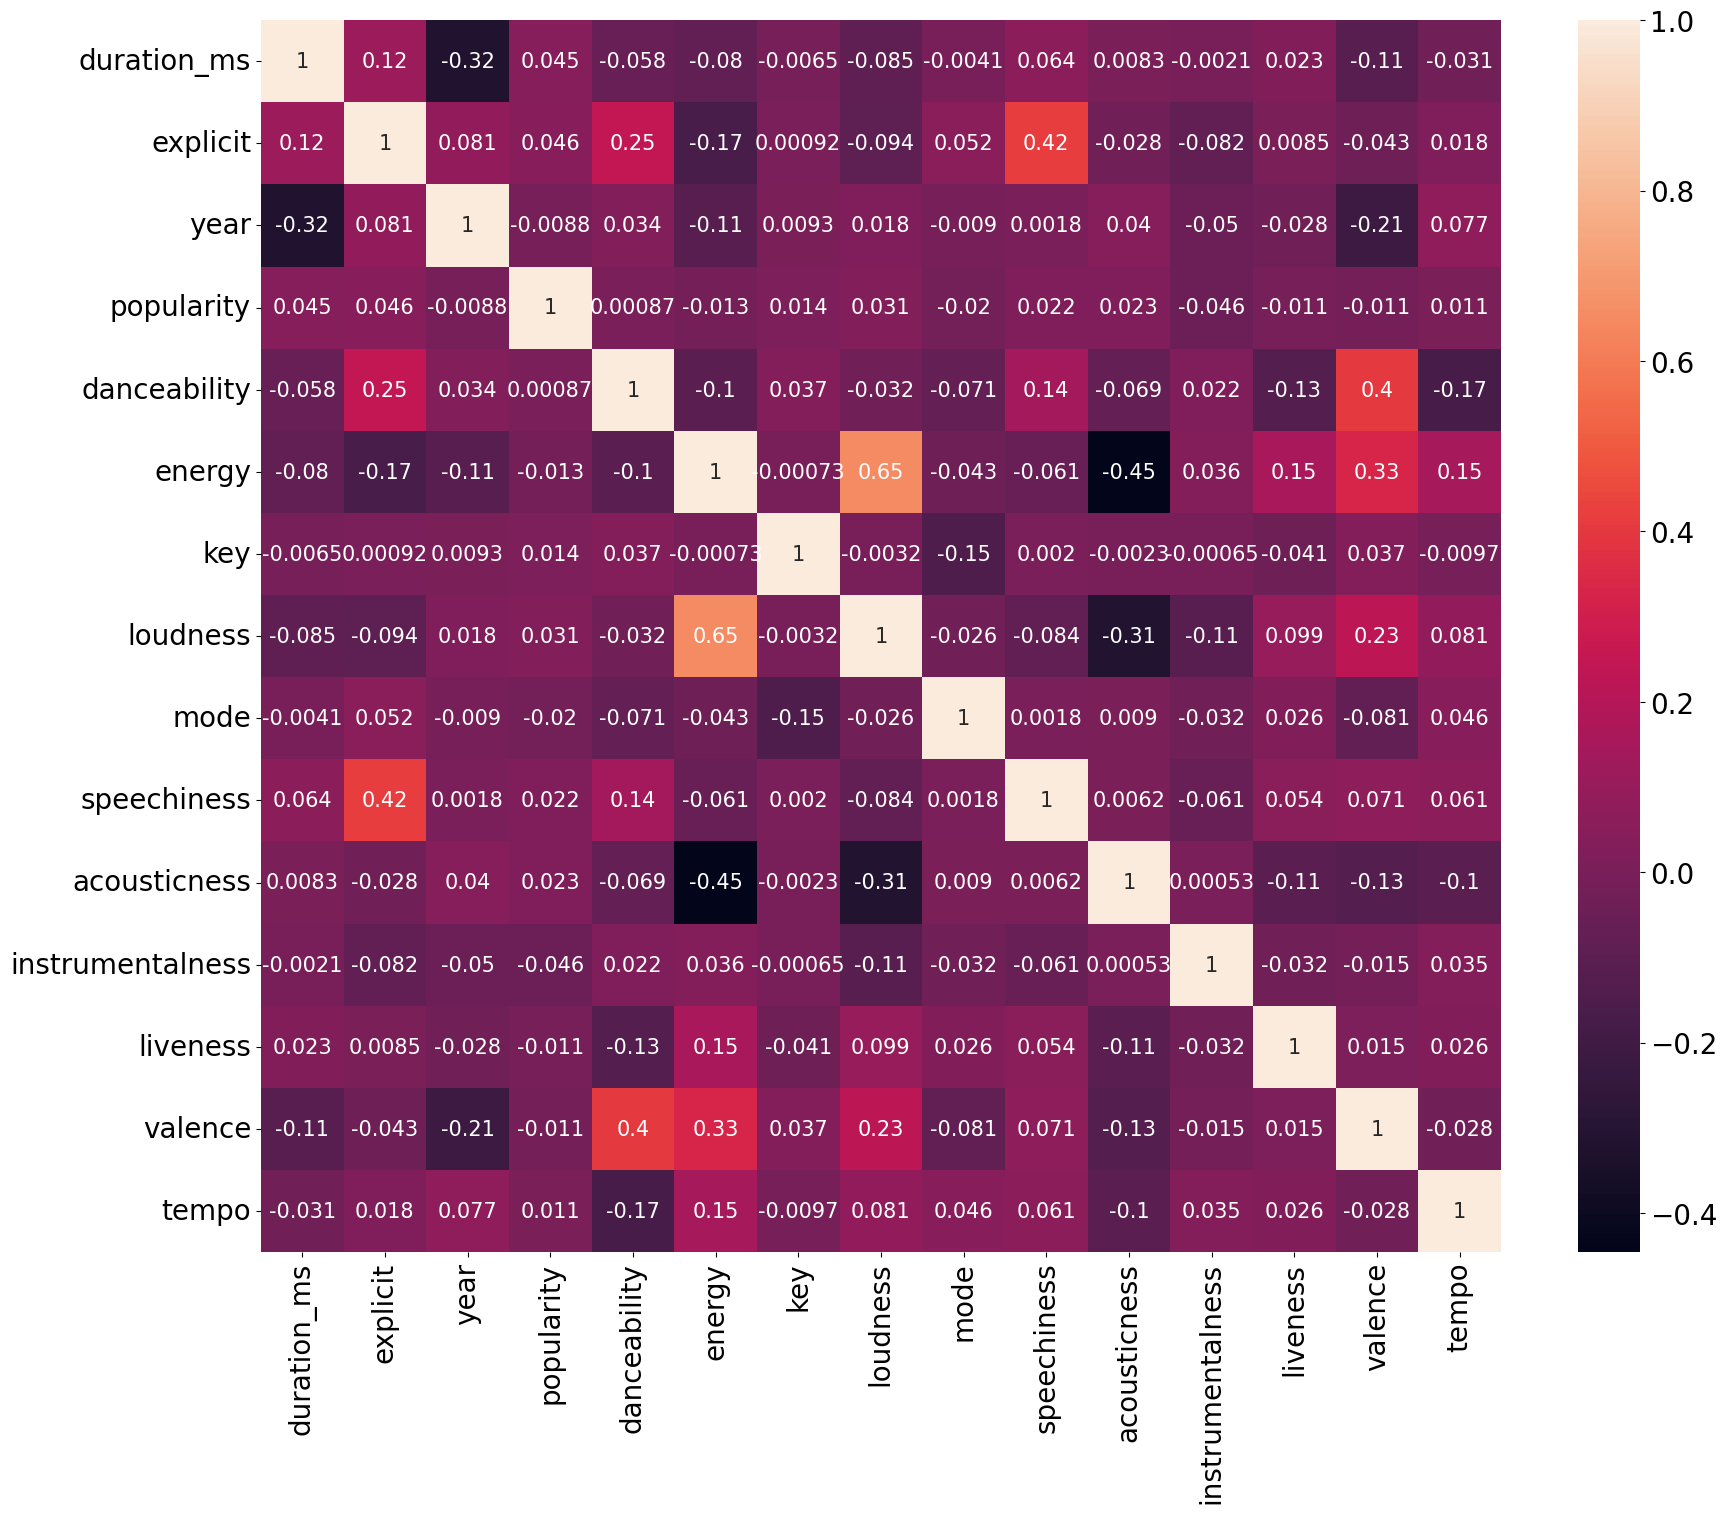

In [18]:
make_correlation_graph(df)

And indeed there is! We can also see some very interesting correlations emering. For example, we can also see that acousticness and energy are negatively correlated. Thus, if someone wants to gain energy from music, they should probably not listen to accoustic songs - which makes sense. For me personally, the all-digital drum and bass genre brings me tons of energy! Also interestingly, valence and danceability are positively correlated. You can dance very well to songs that are cheerful and happy (listen for example to the song 'Happy' by Pharrel Williams on Spotify https://open.spotify.com/album/1cH4YlAyj4dtofkNil6iGl).  

Below we define a quite general histogram that shows the distribution for each field in our DataFrame. Note that we also plot vertical lines that adress the 5% quantile, median and 95% quantile. 

In [19]:
def make_graph_hist(data, column_name):
    graph_name = map_col_name_to_graph_name(column_name)
    fig, ax = plt.subplots(figsize = (6,4))
    df_col = data[column_name]
    df_col.plot(kind = "hist", density = False, alpha = 0.65, bins = 25, color='white') #density=True
    #df_col.plot(kind = "kde", color="blue")
    #mean = df_col.mean()
    median = df_col.median()
    quant_5 = df_col.quantile(0.05)
    quant_95 = df_col.quantile(0.95)
    statistics = [[median, 0.8, 1], [quant_5, 0.8, 1], [quant_95, 0.8, 1]]
    for i in statistics:
        ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color='white')
        
    ax.set_xlabel(graph_name)
    ax.set_ylabel("Frequency")

    #ax.text(median-.25, 0.018, "median", size = 10, alpha =.8, color="white")
    #ax.text(quant_5-.1, 0.018, "5th", size = 10, alpha = 0.8, color="white")
    #ax.text(quant_95-.25, 0.018, "95th Percentile", size = 10, alpha =.8, color="white")

    ax.grid(False)
    ax.set_title("A histogram of " + graph_name)

    ax.tick_params(left = False, bottom = False)
    for ax, spine in ax.spines.items():
        spine.set_visible(False)
    plt.grid(color='grey', linestyle='-', linewidth=0.2)
    plt.rc('font', size=10)
    plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=10)
    plt.show()

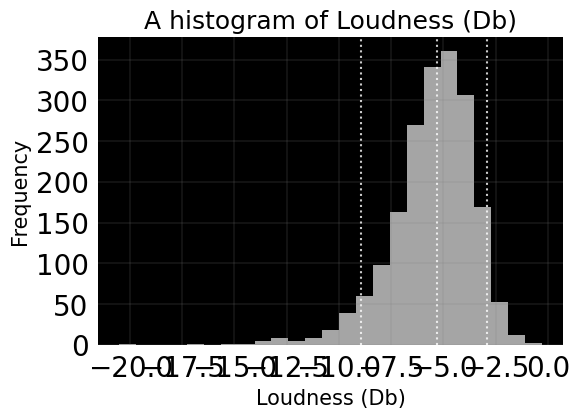

In [20]:
make_graph_hist(df, 'loudness')

Next we show that we can use the SQLite API to filter on very specific factors in order to achieve more detailed datasets. In particular, we want to know whether there has been a change in music creation over the years. For example, whether songs have become more loud or happy. 

In [21]:
#!pip install csv
#!pip install sqlite3

In [22]:
import csv, sqlite3

%load_ext sql
con = sqlite3.connect("spotify.db")
cur = con.cursor()
%sql sqlite:///spotify.db

In [23]:
df.to_sql("spotify_data", con, if_exists='replace', index=False,method="multi")   

In [24]:
%%sql

SELECT * FROM spotify_data LIMIT 5

 * sqlite:///spotify.db
Done.


artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.7509999999999999,0.8340000000000001,1,-5.444,0,0.0437,0.3,1.77e-05,0.355,0.894,95.053,pop
blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.0,0.612,0.684,148.726,"rock, pop"
Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.028999999999999998,0.17300000000000001,0.0,0.251,0.278,136.859,"pop, country"
Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.9129999999999999,0,-4.063,0,0.0466,0.0263,1.3500000000000001e-05,0.34700000000000003,0.544,119.992,"rock, metal"
*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.9279999999999999,8,-4.806,0,0.0516,0.0408,0.0010400000000000001,0.0845,0.879,172.65599999999998,pop


Deleting the the releases in 1998 and 2020

In [25]:
%%sql

DELETE FROM spotify_data WHERE year == 1998 OR year == 2020;

 * sqlite:///spotify.db
4 rows affected.


[]

Often, the previous cell gives us an error - while executing the command. So we have to re-run the cells below. 

In [26]:
df_year = pd.read_sql_query("""

SELECT year, COUNT(year) as Number_of_releases, 
AVG(duration_ms) as Average_duration, 
AVG(explicit) as Explicit_ratio,
AVG(danceability) as Average_danceability, 
AVG(energy) as Average_energy, 
AVG(loudness) as Average_loudness, 
AVG(speechiness) as Average_speechiness,
AVG(acousticness) as Average_acousticness, 
AVG(instrumentalness) as Average_instrumentalness,
AVG(liveness) as Average_liveness, 
AVG(valence) as Average_valence, 
AVG(tempo) as Average_tempo FROM spotify_data GROUP BY year

""", con)

df_genre = pd.read_sql_query("""

SELECT genre, COUNT(genre) as Number_of_songs, 
AVG(duration_ms) as Average_duration, 
AVG(explicit) as Explicit_ratio,
AVG(danceability) as Average_danceability, 
AVG(energy) as Average_energy, 
AVG(loudness) as Average_loudness, 
AVG(speechiness) as Average_speechiness,
AVG(acousticness) as Average_acousticness, 
AVG(instrumentalness) as Average_instrumentalness,
AVG(liveness) as Average_liveness, 
AVG(valence) as Average_valence, 
AVG(tempo) as Average_tempo FROM spotify_data GROUP BY genre

""", con)

Lets look at the data that we created using the SQL API. 

In [27]:
df_year.head()

,year,Number_of_releases,Average_duration,Explicit_ratio,Average_danceability,Average_energy,Average_loudness,Average_speechiness,Average_acousticness,Average_instrumentalness,Average_liveness,Average_valence,Average_tempo
0,1999,37,253701.351351,0.189189,0.670162,0.735405,-5.991757,0.067703,0.138221,0.009413,0.165373,0.572414,123.462946
1,2000,71,250951.281690,0.169014,0.690817,0.747901,-6.174732,0.078725,0.113796,0.031580,0.183014,0.649183,112.660873
2,2001,106,242871.518868,0.216981,0.674698,0.728086,-5.864962,0.107284,0.141410,0.021742,0.174502,0.658815,117.414877
3,2002,85,252388.317647,0.329412,0.674918,0.722176,-5.422376,0.122811,0.138220,0.010541,0.191160,0.579635,112.607424
4,2003,91,236625.439560,0.241758,0.666033,0.706473,-5.811681,0.119910,0.180971,0.040497,0.164974,0.613751,119.410374


In [28]:
df_year['year'] = df_year['year'].values.astype('str')

In [29]:
df_genre

,genre,Number_of_songs,Average_duration,Explicit_ratio,Average_danceability,Average_energy,Average_loudness,Average_speechiness,Average_acousticness,Average_instrumentalness,Average_liveness,Average_valence,Average_tempo
0,Dance/Electronic,41,241092.390244,0.170732,0.684610,0.775829,-5.992390,0.059251,0.068404,1.036060e-01,0.183137,0.523585,125.507537
1,"Folk/Acoustic, pop",2,239590.500000,0.000000,0.563000,0.744500,-4.582500,0.042150,0.478500,0.000000e+00,0.138500,0.352500,111.938000
2,"Folk/Acoustic, rock",1,278666.000000,0.000000,0.408000,0.849000,-5.631000,0.033300,0.013600,2.510000e-05,0.560000,0.628000,84.192000
3,"Folk/Acoustic, rock, pop",1,245173.000000,1.000000,0.517000,0.492000,-8.050000,0.027200,0.027500,3.190000e-05,0.087300,0.455000,138.585000
4,R&B,13,227837.076923,0.153846,0.663462,0.688077,-6.254923,0.121123,0.111138,3.329746e-04,0.158254,0.633308,106.924846
5,"World/Traditional, Folk/Acoustic",1,218546.000000,0.000000,0.418000,0.249000,-13.744000,0.030100,0.841000,6.610000e-01,0.112000,0.213000,82.803000
6,"World/Traditional, hip hop",1,244666.000000,0.000000,0.778000,0.879000,-4.951000,0.037100,0.399000,7.920000e-01,0.150000,0.942000,98.077000
7,"World/Traditional, pop",1,151640.000000,0.000000,0.700000,0.465000,-6.815000,0.358000,0.544000,0.000000e+00,0.606000,0.719000,108.102000
8,"World/Traditional, pop, Folk/Acoustic",2,187039.500000,0.000000,0.667500,0.776500,-6.750500,0.054500,0.276500,0.000000e+00,0.226000,0.790500,102.606500
9,"World/Traditional, rock",2,249300.000000,0.000000,0.473000,0.708000,-4.813000,0.043000,0.001444,2.370400e-01,0.126000,0.489000,118.041500


We want a more balanced dataset, so we remove all genres that have 3 or less songs in the dataset. 

In [30]:
df_genre = df_genre[df_genre['Number_of_songs'] > 3]

In [31]:
df_genre.reset_index().drop(['index'], axis=1)

,genre,Number_of_songs,Average_duration,Explicit_ratio,Average_danceability,Average_energy,Average_loudness,Average_speechiness,Average_acousticness,Average_instrumentalness,Average_liveness,Average_valence,Average_tempo
0,Dance/Electronic,41,241092.390244,0.170732,0.684610,0.775829,-5.992390,0.059251,0.068404,1.036060e-01,0.183137,0.523585,125.507537
1,R&B,13,227837.076923,0.153846,0.663462,0.688077,-6.254923,0.121123,0.111138,3.329746e-04,0.158254,0.633308,106.924846
2,country,9,223389.444444,0.000000,0.576889,0.759444,-4.982000,0.036556,0.208269,4.277778e-07,0.151956,0.594778,138.150778
3,hip hop,121,229791.355372,0.867769,0.722554,0.687694,-5.773289,0.204176,0.139708,5.190502e-03,0.204418,0.536955,116.676942
4,"hip hop, Dance/Electronic",15,236000.133333,0.466667,0.763533,0.698867,-6.389600,0.143940,0.079324,3.468713e-04,0.117333,0.535667,135.429667
5,"hip hop, pop",266,235997.503759,0.676692,0.734274,0.698737,-5.546579,0.171459,0.099460,2.230818e-03,0.195727,0.553083,119.093669
6,"hip hop, pop, Dance/Electronic",75,213594.493333,0.160000,0.670013,0.816733,-4.085013,0.084987,0.090175,1.798249e-02,0.209391,0.541500,120.855520
7,"hip hop, pop, R&B",235,240288.382979,0.421277,0.710800,0.663404,-6.082813,0.127283,0.129327,5.056364e-03,0.168583,0.577637,115.524311
8,"hip hop, pop, latin",14,235881.642857,0.071429,0.713714,0.816786,-4.967286,0.102779,0.056026,1.522057e-04,0.269257,0.730571,127.211929
9,"hip hop, pop, rock",9,233749.222222,0.666667,0.723556,0.797222,-4.220778,0.148167,0.135230,2.227467e-04,0.189500,0.632556,123.112333


We can use the code of the previous make_graph_scatter function to make a new function for the genres

In [32]:
def map_col_name_to_graph_name_genre(column_name):
    columns = df_genre.columns.tolist()
    graph_names = ['Genre',
     'Number of songs',
     'Duration',
     'Explicit ratio',
     'Danceability',
     'Energy',
     'Loudness',
     'Speechiness',
     'Acousticness',
     'Instrumentalness',
     'Liveness',
     'Valence',
     'Tempo']
    try: 
        index = columns.index(column_name)
    except:
        print('This is not a column name!')
    return graph_names[index]

def make_graph_scatter_genre(data, column_name_1, column_name_3 = 'white'):
    column_name_2 = 'genre'
    graph_name_1, graph_name_2 = map_col_name_to_graph_name_genre(column_name_1), map_col_name_to_graph_name_genre(column_name_2) 
    try: 
        graph_name_3 = map_col_name_to_graph_name_genre(column_name_3)
    except:
        pass
    plt.figure(figsize=(20,16))
    plt.scatter(x=column_name_1, y=column_name_2, c=column_name_3, data=data, s=300)
    plt.grid()
    plt.xlabel(graph_name_1)
    plt.ylabel(graph_name_2)
    if column_name_3 == 'white':
        plt.title(graph_name_2 + ' vs ' + graph_name_1)
    else:
        plt.title(graph_name_2 + ' vs ' + graph_name_1 + ' vs ' + graph_name_3)
        cmap = plt.get_cmap('plasma')
        plt.set_cmap(cmap)
        cbar = plt.colorbar()
        cbar.set_label(graph_name_3)
    plt.rc('font', size=40)
    plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=30)
    #plt.xticks(rotation=90)
    plt.show()

In [33]:
map_col_name_to_graph_name_genre('Average_duration')

'Duration'

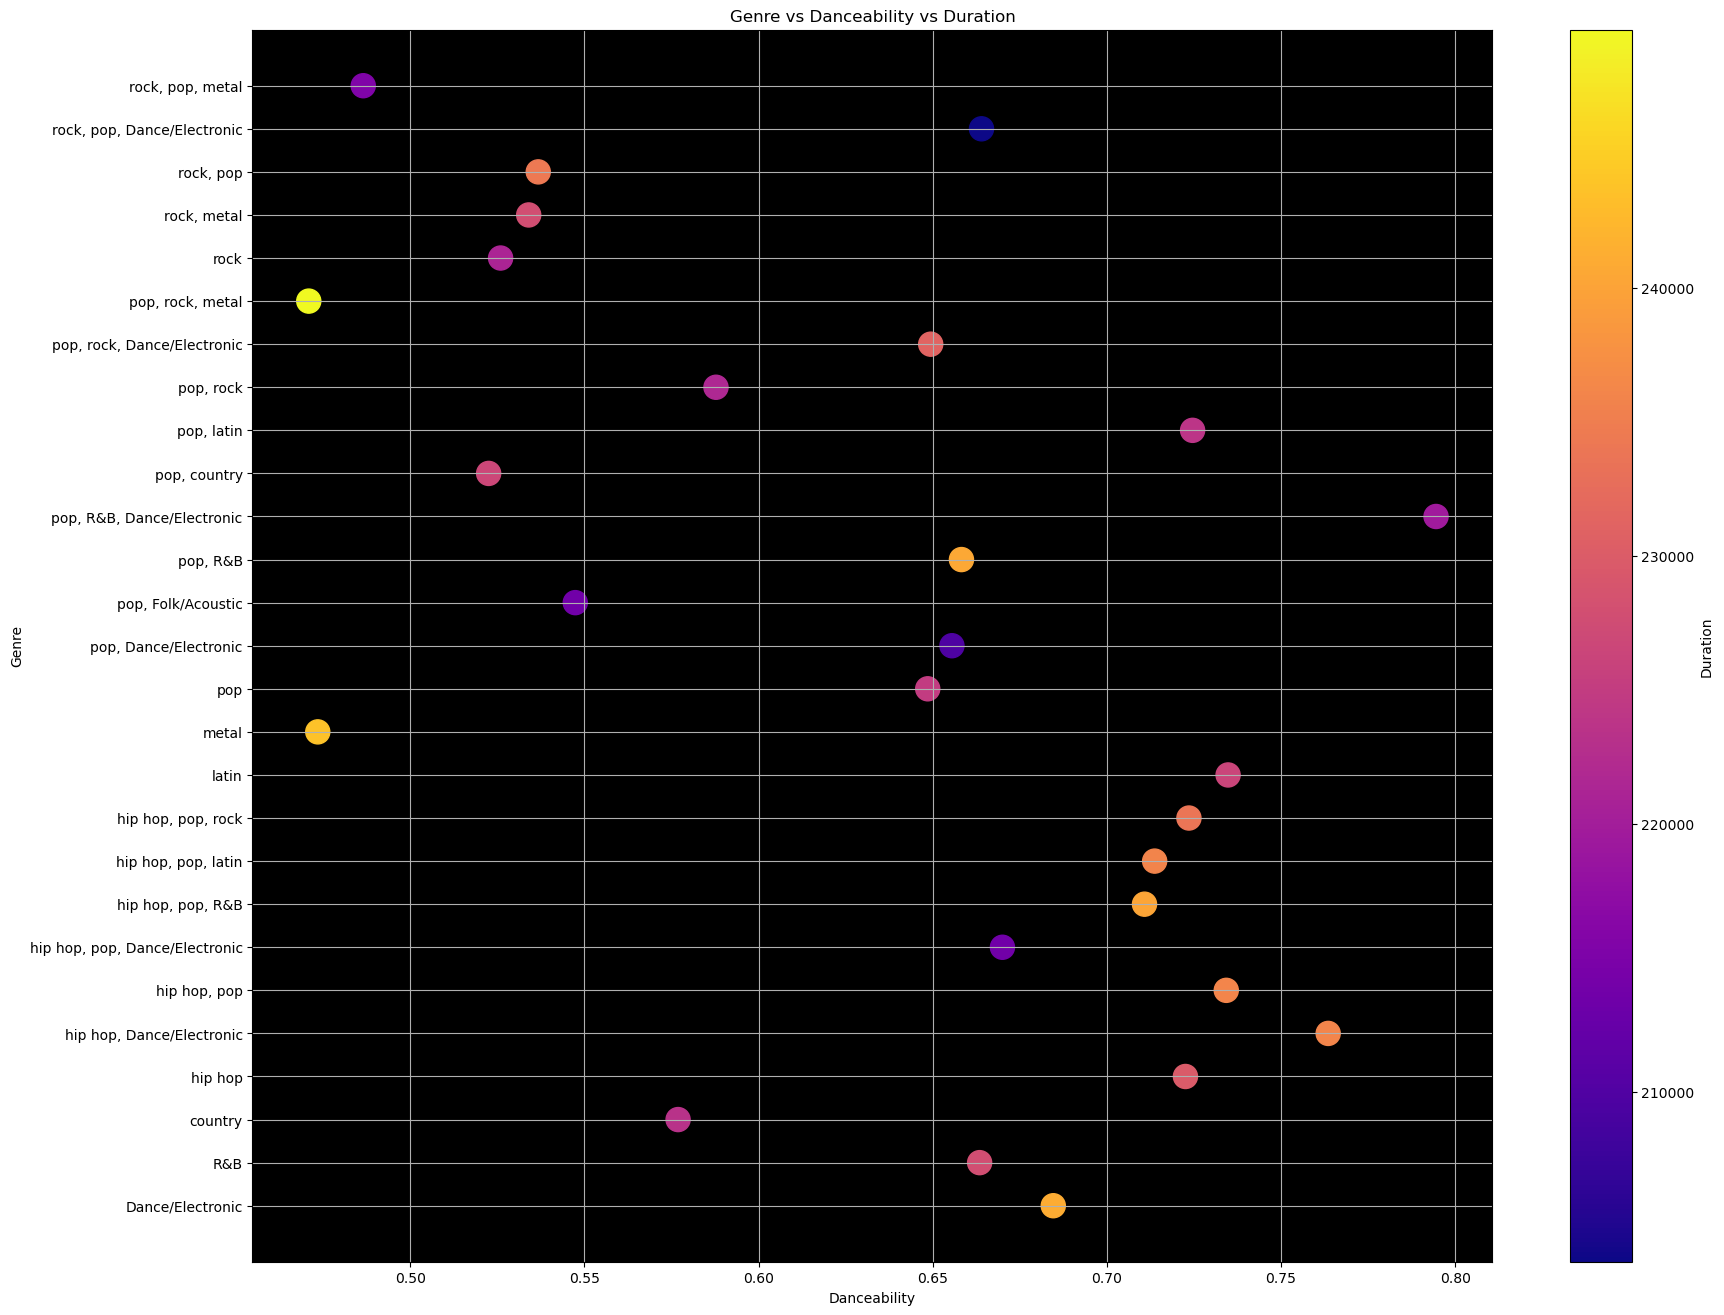

In [34]:
make_graph_scatter_genre(data=df_genre, column_name_1='Average_danceability', column_name_3 = 'Average_duration')

Now we make a beautiful line-graph for the data with respect to release year. 

In [35]:
def map_col_name_to_graph_name_year(column_name):
    columns = df_year.columns.tolist()
    graph_names = ['Year',
     'Number of Releases',
     'Duration (Milliseconds)',
     'Explicit ratio',
     'Danceability',
     'Energy',
     'Loudness (Db)',
     'Speechiness',
     'Acousticness',
     'Instrumentalness',
     'Liveness',
     'Valence',
     'Tempo (BPM)']
    try: 
        index = columns.index(column_name)
    except:
        print('This is not a column name!')
    return graph_names[index]

def make_graph_scatter_year(data, column_name_2, column_name_3 = 'white'):
    column_name_1 = 'year'
    graph_name_1, graph_name_2 = map_col_name_to_graph_name_year(column_name_1), map_col_name_to_graph_name_year(column_name_2) 
    try: 
        graph_name_3 = map_col_name_to_graph_name_year(column_name_3)
    except:
        pass
    
    fig, ax1 = plt.subplots()
    
    fig.set_size_inches(20.5, 11.5)
    
    ax1.set_xlabel(graph_name_1)
    ax1.set_ylabel(graph_name_2)
    Axis1, = ax1.plot(column_name_1, column_name_2, color = 'lightblue', data=data)
    ax1.tick_params(axis ='y')
    
    ax2 = ax1.twinx()
 
    ax2.set_ylabel(graph_name_3)
    Axis2, = ax2.plot(column_name_1, column_name_3, color = 'lightgreen', data=data)
    ax2.tick_params(axis ='y')

    #plt.plot(column_name_1, column_name_2, c='white', data=data)
    #plt.plot(column_name_1, column_name_3, c='blue', data=data)
    
    ax1.grid('both', color='grey', linestyle='-', linewidth=0.2)
    #plt.xlabel(graph_name_1)
    #plt.ylabel(graph_name_2)
    #if column_name_3 == 'white':
    #    plt.title(graph_name_2 + ' vs ' + graph_name_1)
    #else:
    #    plt.title(graph_name_2 + ' vs ' + graph_name_1 + ' vs ' + graph_name_3)
    #    cmap = plt.get_cmap('plasma')
    #    plt.set_cmap(cmap)
    #    cbar = plt.colorbar()
    #    cbar.set_label(graph_name_3)

    
    
    legend = ax1.legend([Axis1, Axis2], [graph_name_2, graph_name_3], prop={'size': 20})
    for text in legend.get_texts():
        text.set_color("white")
    plt.draw()
    plt.rc('font', size=30)
    plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=20)
    ax1.set_xticklabels(data[column_name_1], rotation=90, ha='right')
    plt.show()

C:\Users\Jurri\AppData\Local\Temp\ipykernel_7788\304192141.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data[column_name_1], rotation=90, ha='right')


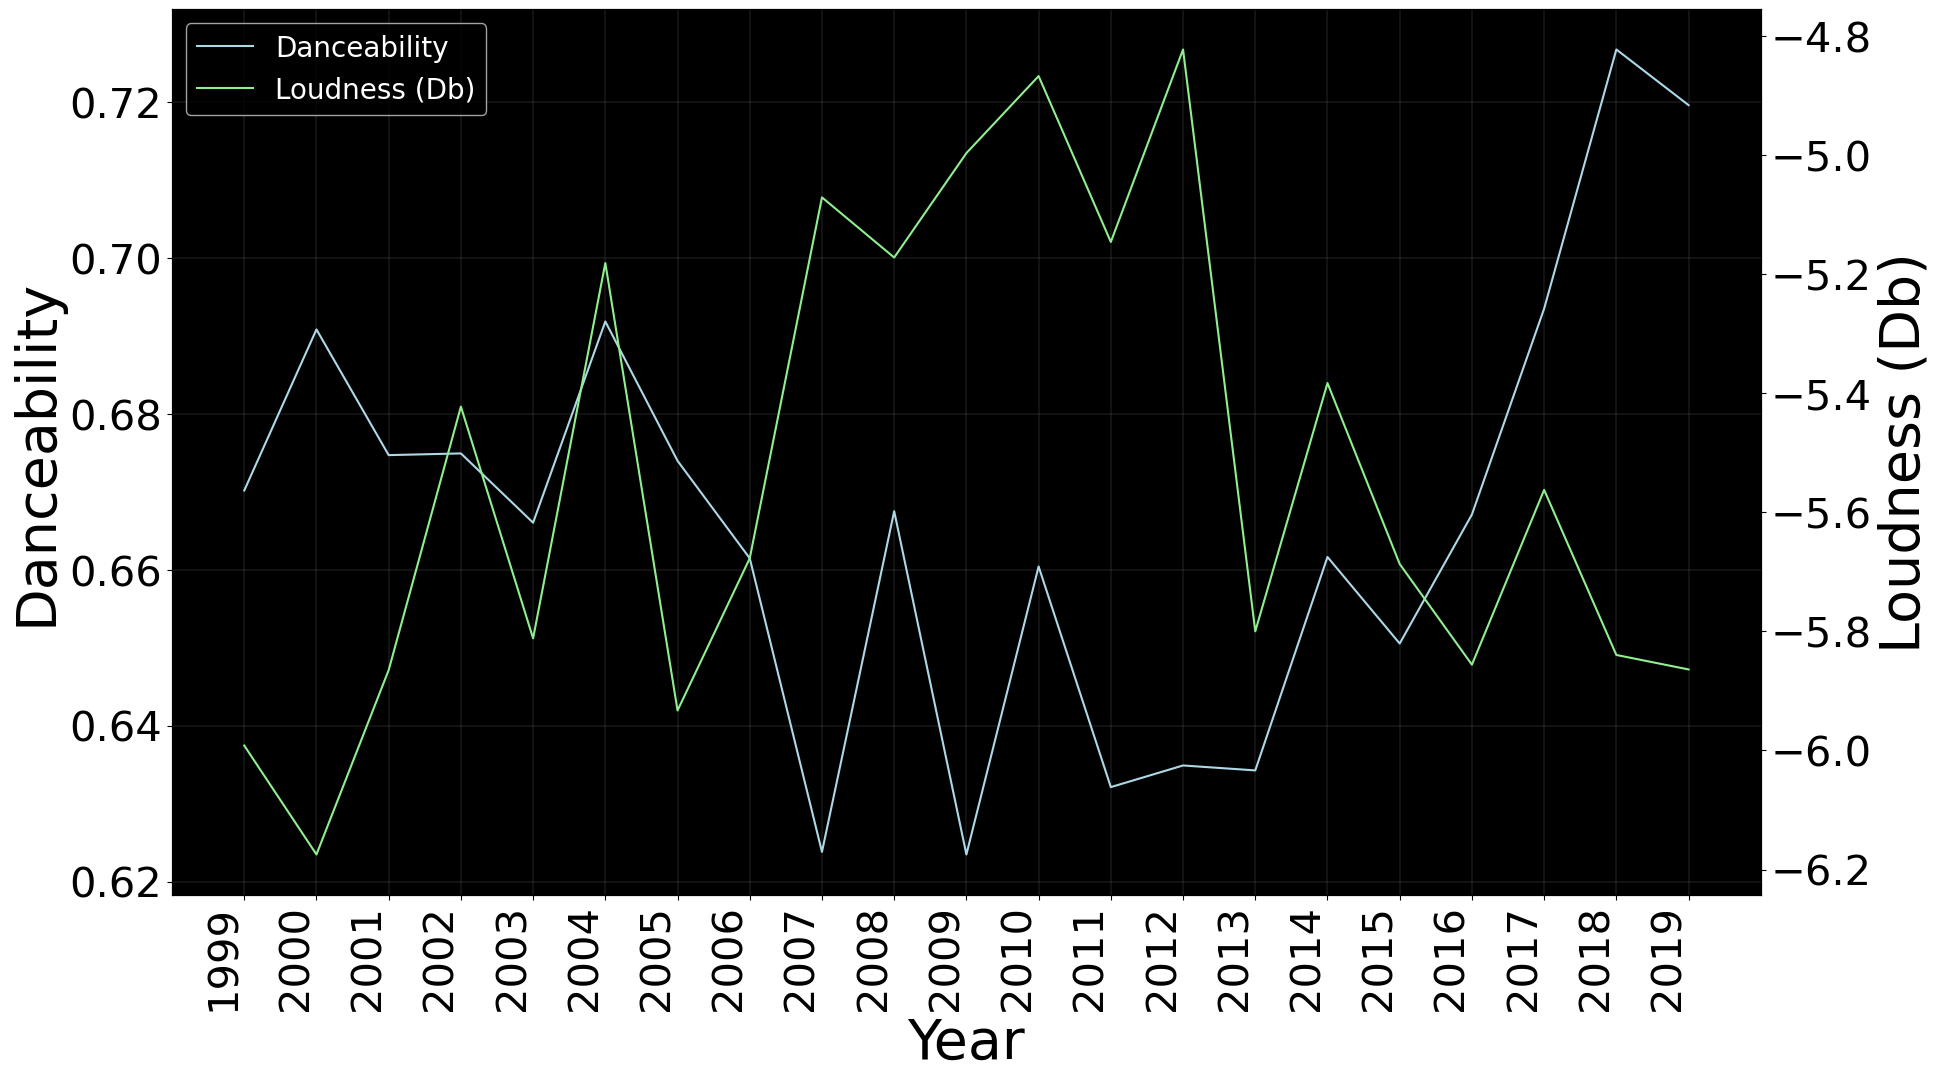

In [36]:
make_graph_scatter_year(df_year, column_name_2 = 'Average_danceability', column_name_3 = 'Average_loudness')

Very interestingly, we see that when we group by year - the average danceability and loudness exress some form of correlation; This could also be a huge coincidence. We did not see this appearing in our correlation chart earlier!

Now that we have enough graphs on the data, we can start constructing our dashboard using Dash and JupyterDash. See App.py in Github folder.